_______________________________________________________________________________________________________________

Iteration number:	 1
loss: 180331328.000


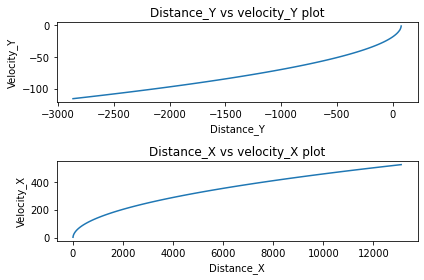

_______________________________________________________________________________________________________________

Iteration number:	 2
loss: 162148416.000


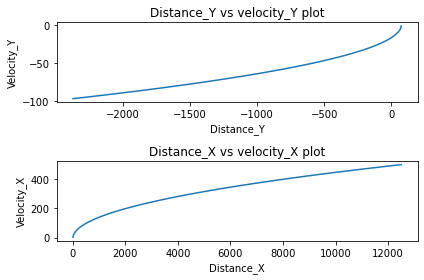

_______________________________________________________________________________________________________________

Iteration number:	 3
loss: 148339760.000


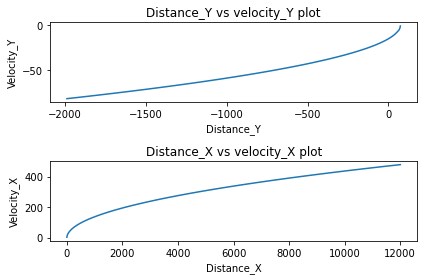

_______________________________________________________________________________________________________________

Iteration number:	 4
loss: 137533664.000


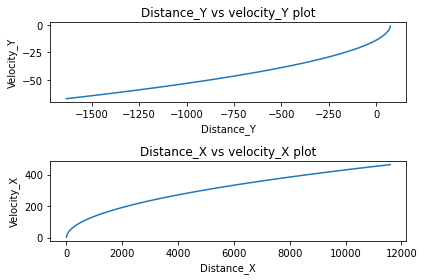

_______________________________________________________________________________________________________________

Iteration number:	 5
loss: 130407872.000


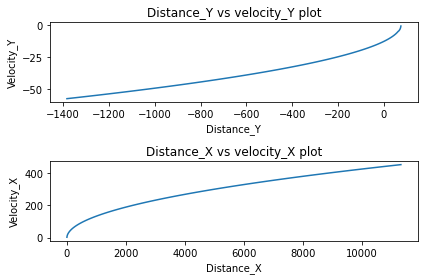

_______________________________________________________________________________________________________________

Iteration number:	 6
loss: 123555080.000


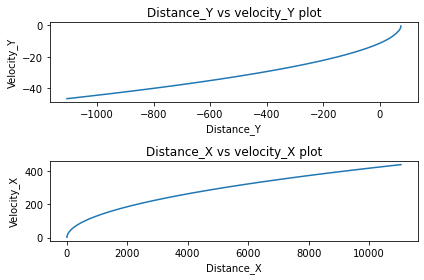

_______________________________________________________________________________________________________________

Iteration number:	 7
loss: 118263200.000


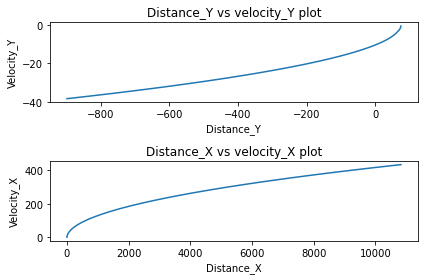

_______________________________________________________________________________________________________________

Iteration number:	 8
loss: 114183888.000


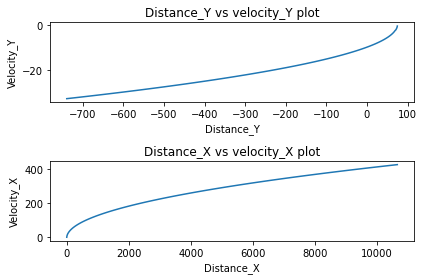

_______________________________________________________________________________________________________________

Iteration number:	 9
loss: 111430440.000


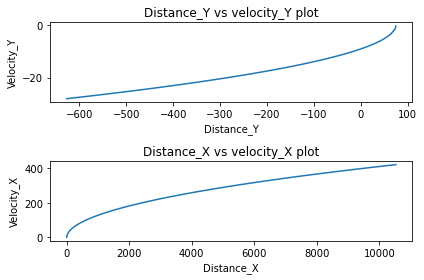

_______________________________________________________________________________________________________________

Iteration number:	 10
loss: 109090640.000


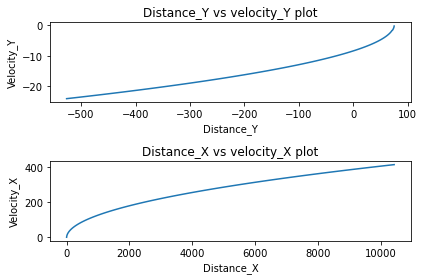

_______________________________________________________________________________________________________________

Iteration number:	 11
loss: 107158560.000


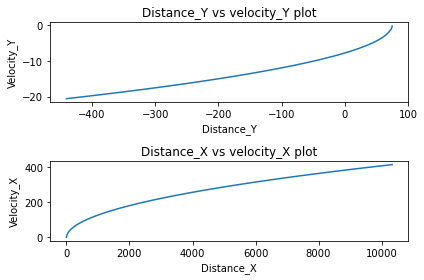

_______________________________________________________________________________________________________________

Iteration number:	 12
loss: 105565192.000


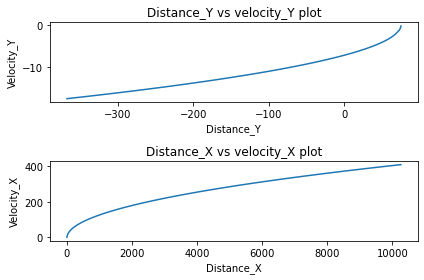

_______________________________________________________________________________________________________________

Iteration number:	 13
loss: 104250704.000


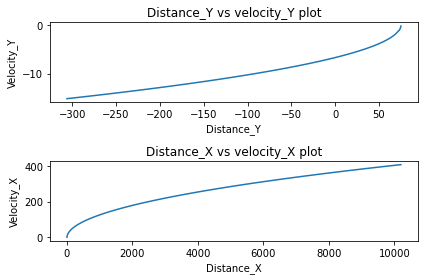

_______________________________________________________________________________________________________________

Iteration number:	 14
loss: 103159392.000


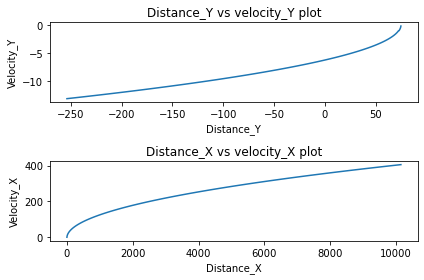

_______________________________________________________________________________________________________________

Iteration number:	 15
loss: 102265512.000


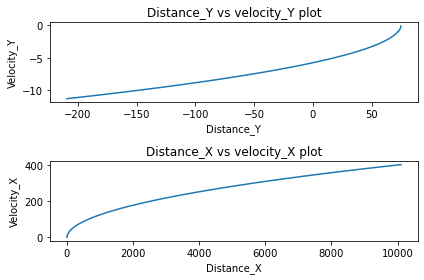

_______________________________________________________________________________________________________________

Iteration number:	 16
loss: 101529544.000


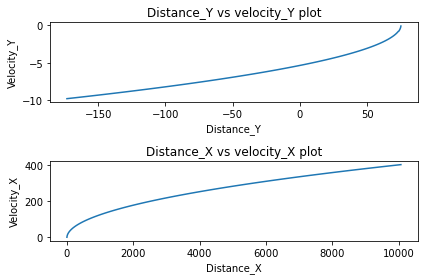

_______________________________________________________________________________________________________________

Iteration number:	 17
loss: 100905216.000


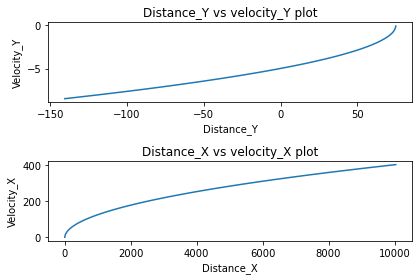

_______________________________________________________________________________________________________________

Iteration number:	 18
loss: 100379424.000


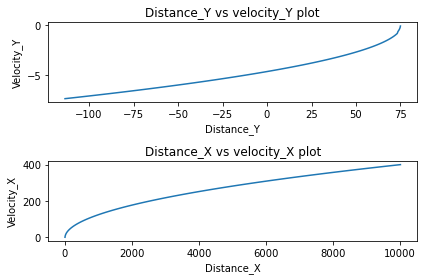

_______________________________________________________________________________________________________________

Iteration number:	 19
loss: 99985880.000


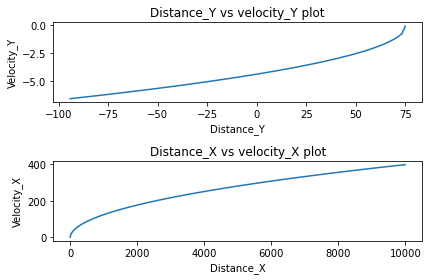

_______________________________________________________________________________________________________________

Iteration number:	 20
loss: 99604368.000


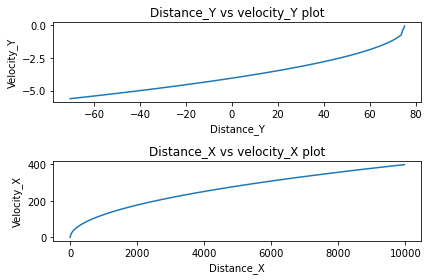

_______________________________________________________________________________________________________________

Iteration number:	 21
loss: 99343360.000


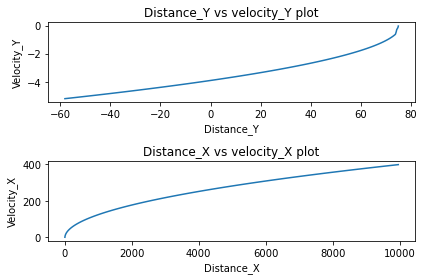

_______________________________________________________________________________________________________________

Iteration number:	 22
loss: 99093736.000


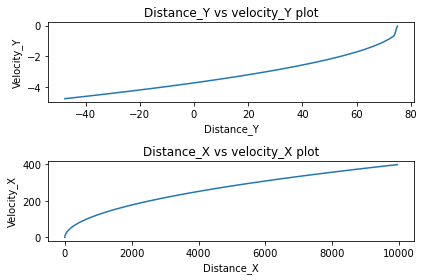

_______________________________________________________________________________________________________________

Iteration number:	 23
loss: 98919432.000


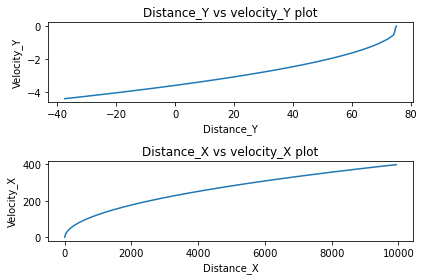

_______________________________________________________________________________________________________________

Iteration number:	 24
loss: 98777584.000


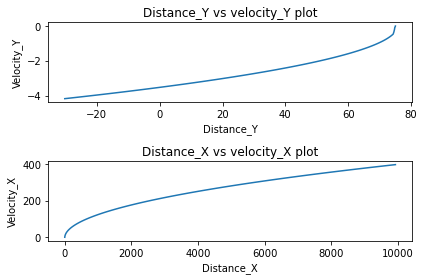

_______________________________________________________________________________________________________________

Iteration number:	 25
loss: 98652104.000


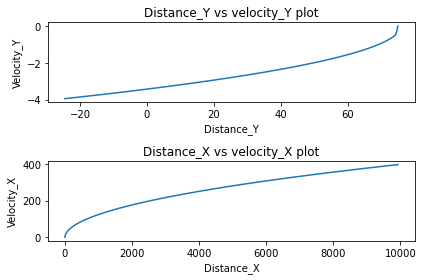

_______________________________________________________________________________________________________________

Iteration number:	 26
loss: 98557736.000


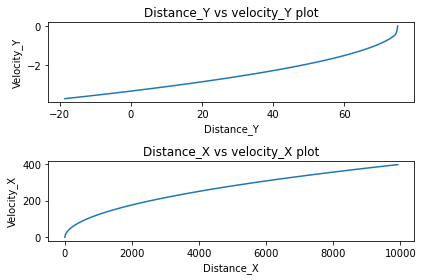

_______________________________________________________________________________________________________________

Iteration number:	 27
loss: 98481112.000


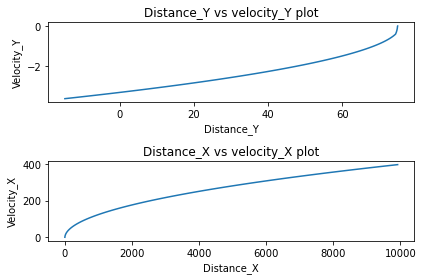

_______________________________________________________________________________________________________________

Iteration number:	 28
loss: 98417864.000


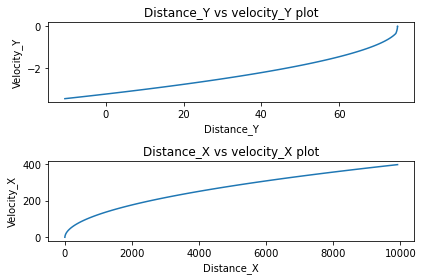

_______________________________________________________________________________________________________________

Iteration number:	 29
loss: 98366320.000


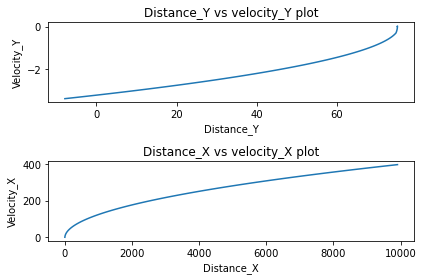

_______________________________________________________________________________________________________________

Iteration number:	 30
loss: 98323760.000


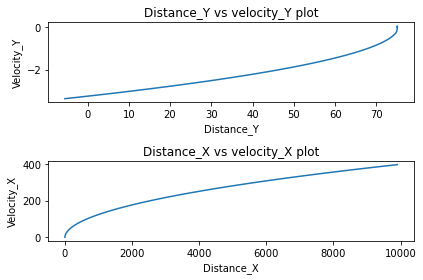

_______________________________________________________________________________________________________________

Iteration number:	 31
loss: 98288760.000


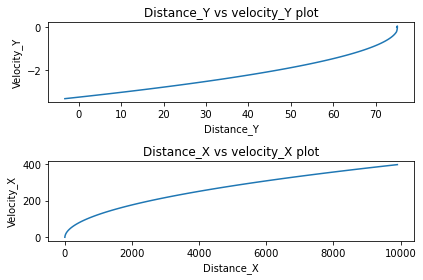

_______________________________________________________________________________________________________________

Iteration number:	 32
loss: 98260552.000


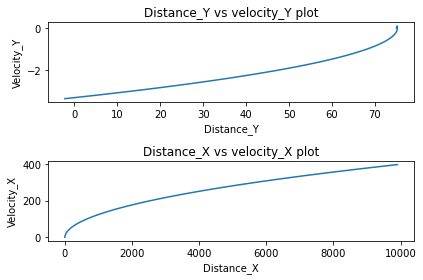

_______________________________________________________________________________________________________________

Iteration number:	 33
loss: 98237376.000


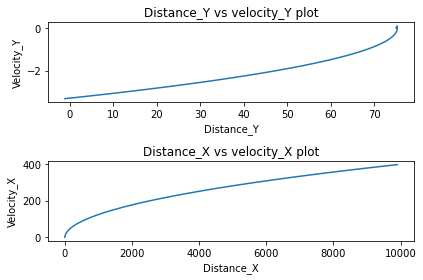

_______________________________________________________________________________________________________________

Iteration number:	 34
loss: 98218480.000


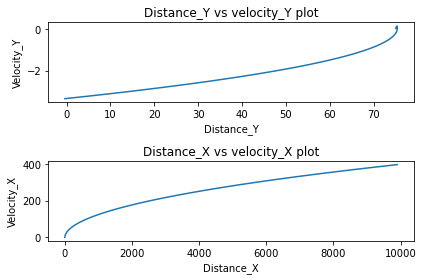

_______________________________________________________________________________________________________________

Iteration number:	 35
loss: 98202960.000


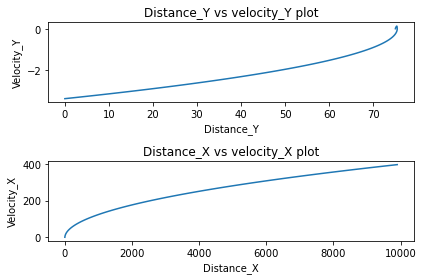

_______________________________________________________________________________________________________________

Iteration number:	 36
loss: 98190120.000


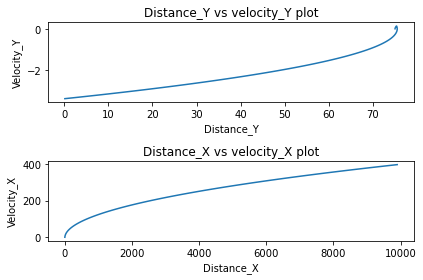

_______________________________________________________________________________________________________________

Iteration number:	 37
loss: 98179720.000


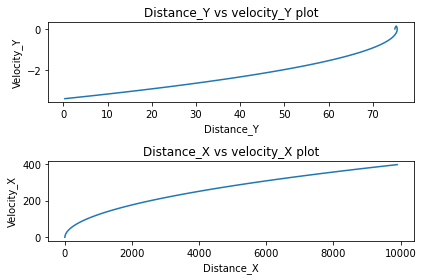

_______________________________________________________________________________________________________________

Iteration number:	 38
loss: 98171328.000


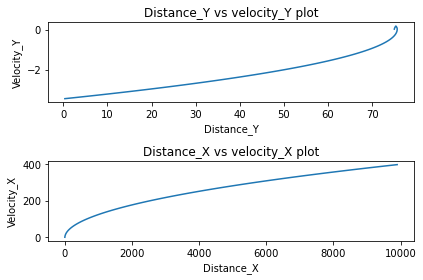

_______________________________________________________________________________________________________________

Iteration number:	 39
loss: 98164328.000


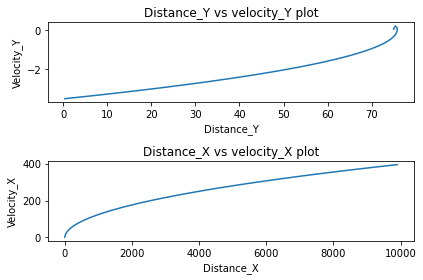

_______________________________________________________________________________________________________________

Iteration number:	 40
loss: 98158696.000


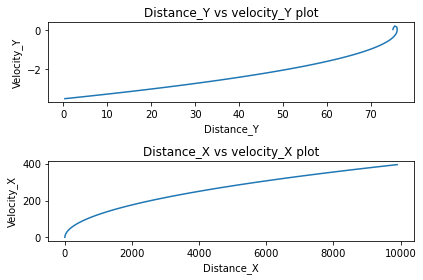

_______________________________________________________________________________________________________________

Iteration number:	 41
loss: 98154064.000


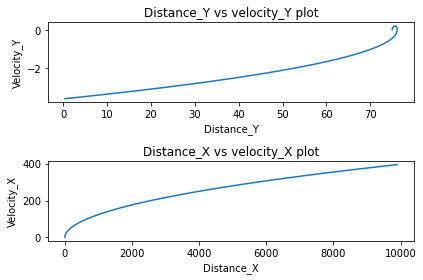

_______________________________________________________________________________________________________________

Iteration number:	 42
loss: 98150304.000


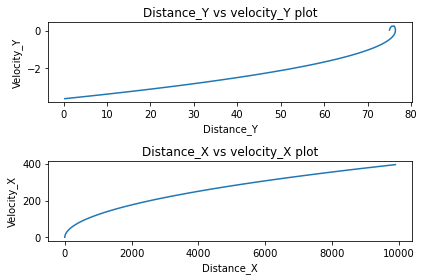

_______________________________________________________________________________________________________________

Iteration number:	 43
loss: 98147352.000


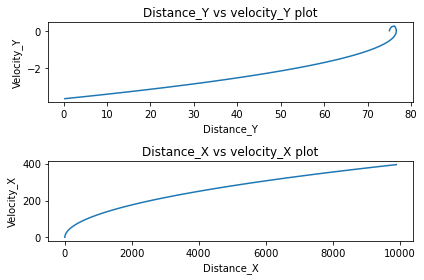

_______________________________________________________________________________________________________________

Iteration number:	 44
loss: 98144824.000


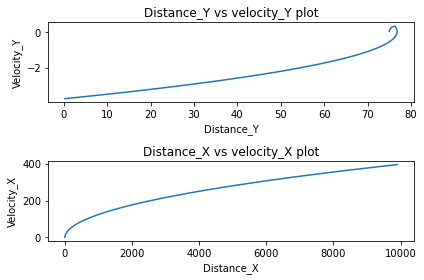

_______________________________________________________________________________________________________________

Iteration number:	 45
loss: 98143320.000


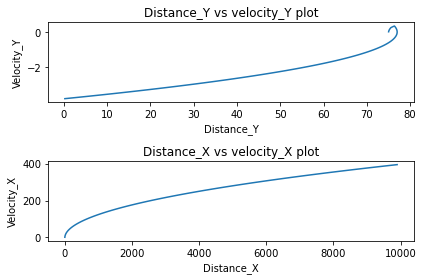

_______________________________________________________________________________________________________________

Iteration number:	 46
loss: 98141408.000


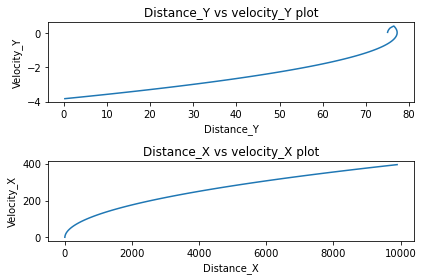

_______________________________________________________________________________________________________________

Iteration number:	 47
loss: 98140392.000


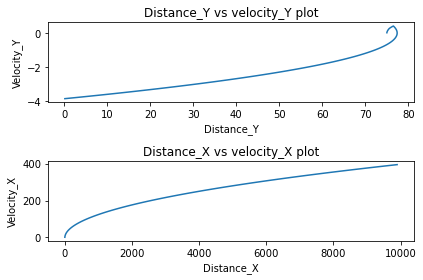

_______________________________________________________________________________________________________________

Iteration number:	 48
loss: 98139776.000


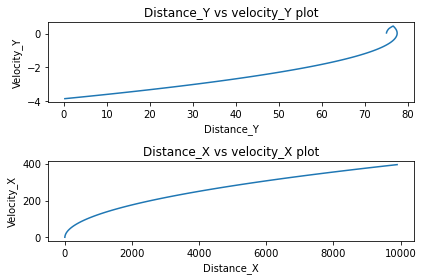

_______________________________________________________________________________________________________________

Iteration number:	 49
loss: 98139312.000


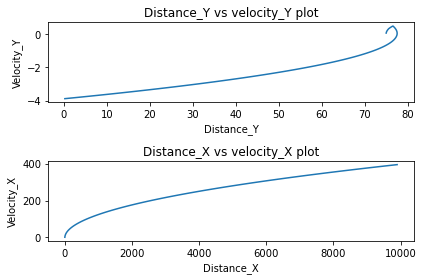

_______________________________________________________________________________________________________________

Iteration number:	 50
loss: 98139216.000


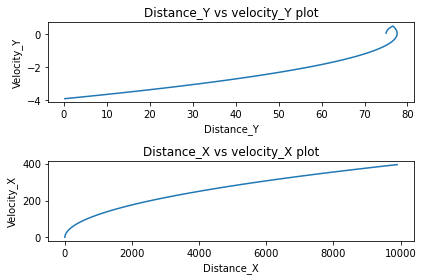

_______________________________________________________________________________________________________________

Iteration number:	 51
loss: 98139112.000


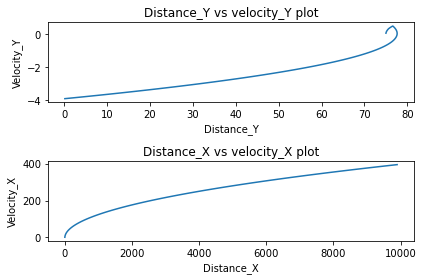

_______________________________________________________________________________________________________________

Iteration number:	 52
loss: 98139112.000


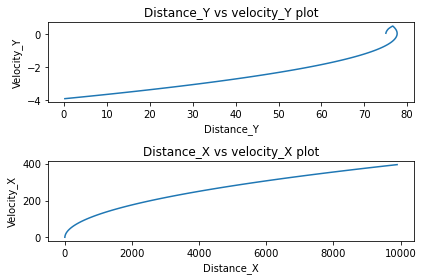

_______________________________________________________________________________________________________________

Iteration number:	 53
loss: 98139040.000


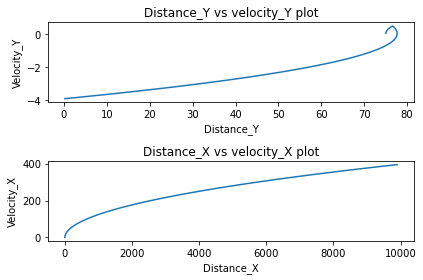

_______________________________________________________________________________________________________________

Iteration number:	 54
loss: 98139016.000


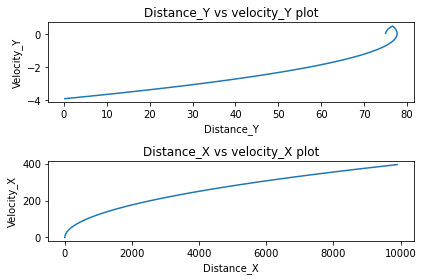

_______________________________________________________________________________________________________________

Iteration number:	 55
loss: 98138592.000


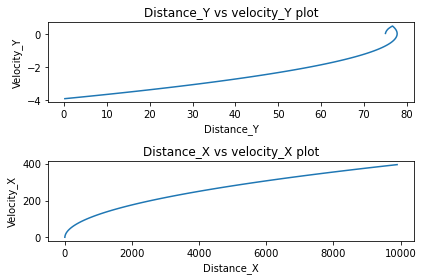

_______________________________________________________________________________________________________________

Iteration number:	 56
loss: 98138576.000


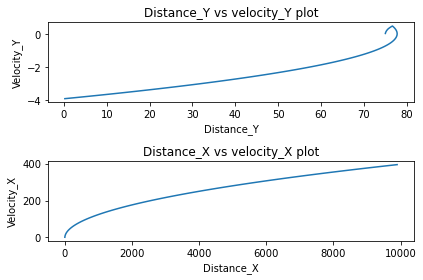

_______________________________________________________________________________________________________________

Iteration number:	 57
loss: 98138344.000


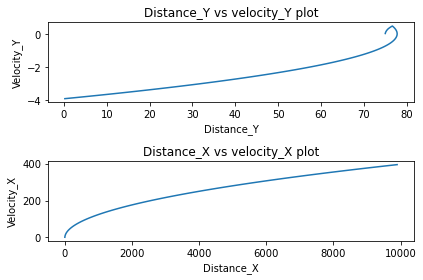

_______________________________________________________________________________________________________________

Iteration number:	 58
loss: 98138208.000


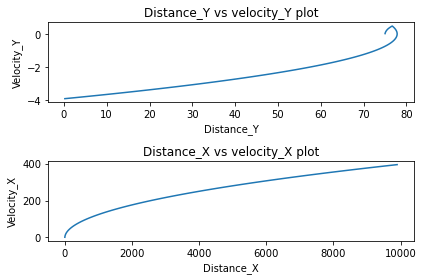

_______________________________________________________________________________________________________________

Iteration number:	 59
loss: 98137800.000


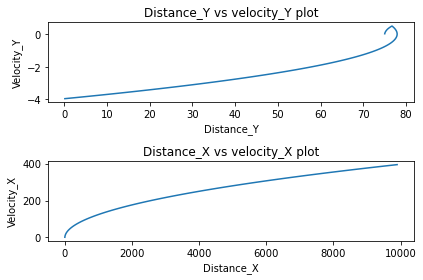

_______________________________________________________________________________________________________________

Iteration number:	 60
loss: 98137784.000


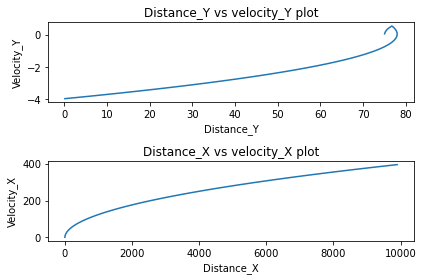

_______________________________________________________________________________________________________________

Iteration number:	 61
loss: 98137784.000


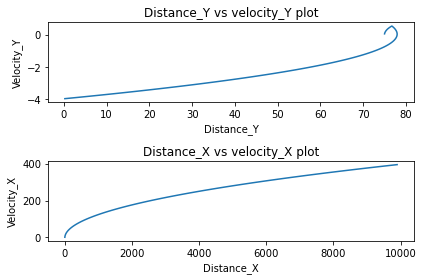

_______________________________________________________________________________________________________________

Iteration number:	 62
loss: 98137784.000


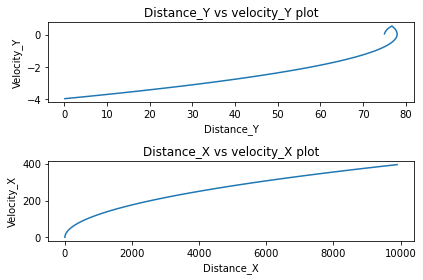

_______________________________________________________________________________________________________________

Iteration number:	 63
loss: 98137784.000


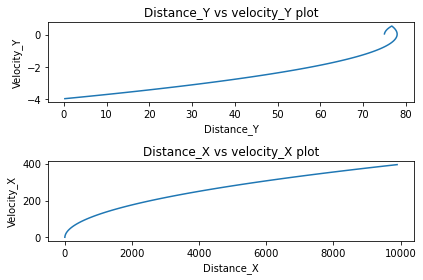

_______________________________________________________________________________________________________________

Iteration number:	 64
loss: 98137624.000


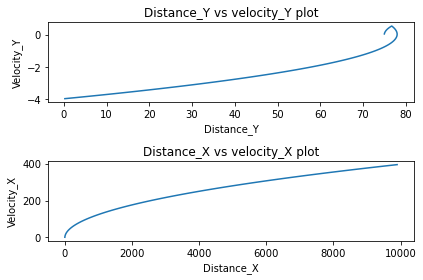

_______________________________________________________________________________________________________________

Iteration number:	 65
loss: 98137592.000


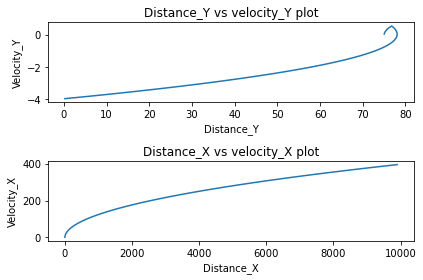

_______________________________________________________________________________________________________________

Iteration number:	 66
loss: 98137360.000


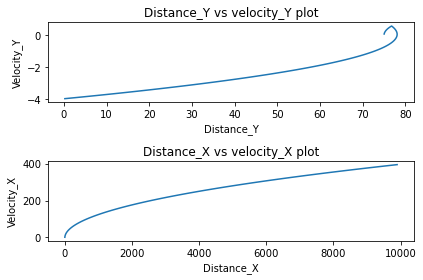

_______________________________________________________________________________________________________________

Iteration number:	 67
loss: 98137336.000


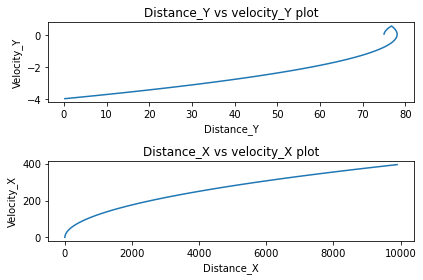

_______________________________________________________________________________________________________________

Iteration number:	 68
loss: 98137184.000


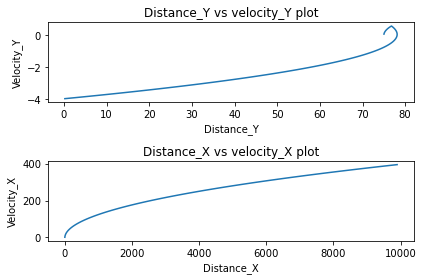

_______________________________________________________________________________________________________________

Iteration number:	 69
loss: 98137160.000


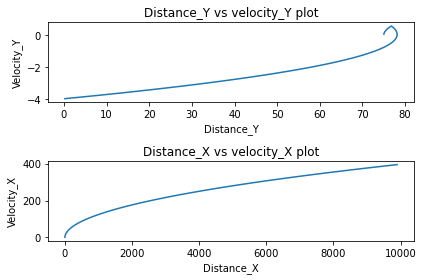

_______________________________________________________________________________________________________________

Iteration number:	 70
loss: 98136992.000


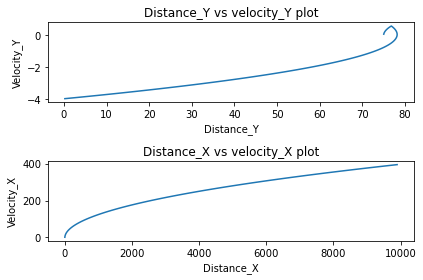

_______________________________________________________________________________________________________________

Iteration number:	 71
loss: 98136992.000


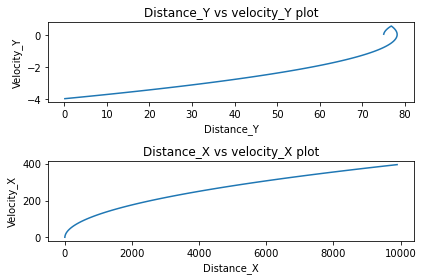

_______________________________________________________________________________________________________________

Iteration number:	 72
loss: 98136952.000


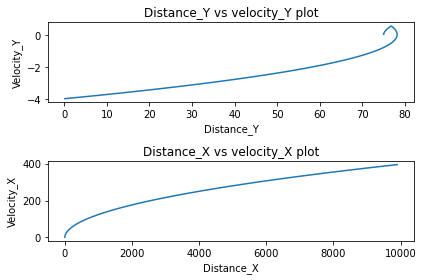

_______________________________________________________________________________________________________________

Iteration number:	 73
loss: 98136952.000


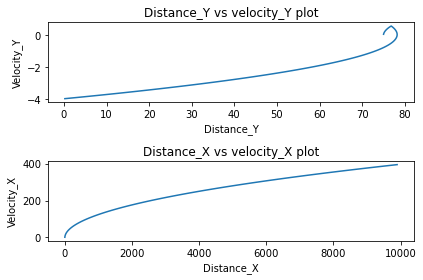

_______________________________________________________________________________________________________________

Iteration number:	 74
loss: 98136872.000


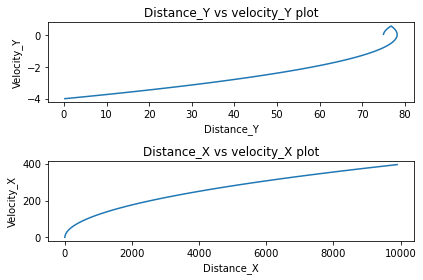

_______________________________________________________________________________________________________________

Iteration number:	 75
loss: 98136856.000


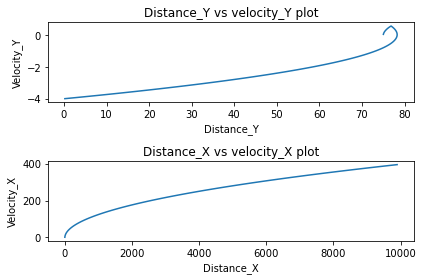

_______________________________________________________________________________________________________________

Iteration number:	 76
loss: 98136536.000


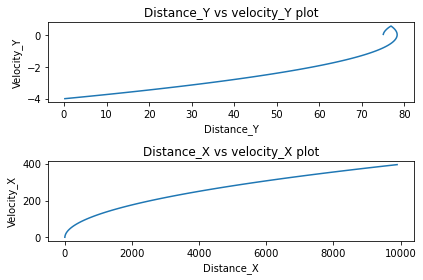

_______________________________________________________________________________________________________________

Iteration number:	 77
loss: 98136536.000


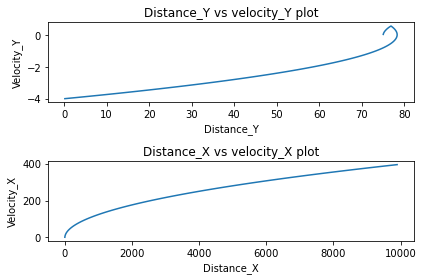

_______________________________________________________________________________________________________________

Iteration number:	 78
loss: 98136536.000


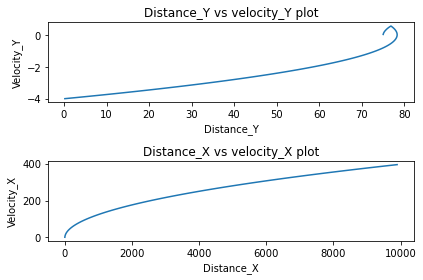

_______________________________________________________________________________________________________________

Iteration number:	 79
loss: 98136520.000


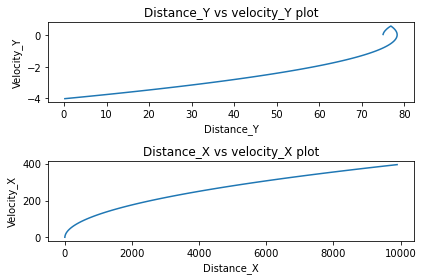

_______________________________________________________________________________________________________________

Iteration number:	 80
loss: 98136424.000


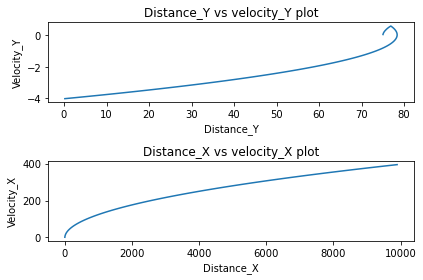

In [2]:
import logging
import math
import random
import numpy as np
import time
import torch as t
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)
FRAME_TIME = 0.5  # time interval
GRAVITY_ACCEL = 9.8  # gravity constant g = 9.8 m/s^2
BOOST_ACCEL = 25  


class Dynamics(nn.Module):

    def __init__(self):
        super(Dynamics, self).__init__()

    @staticmethod
    def forward(state, action):
        """
        action[0] = Thrust in y
        action[1] = Thrust in x
        state[0] = y
        state[1] = y_dot
        state[2] = x
        state[3] = x_dot
        """

        # Apply gravity
        # Note: Here gravity is used to change velocity which is the second element of the state vector
        # Normally, we would do x[1] = x[1] + gravity * delta_time
        # but this is not allowed in PyTorch since it overwrites one variable (x[1]) that is part of the computational graph to be differentiated.
        # Therefore, I define a tensor dx = [0., gravity * delta_time], and do x = x + dx. This is allowed...

        delta_state_gravity = t.tensor([0., GRAVITY_ACCEL * FRAME_TIME, 0., 0.])  # Converting to 2D

        # Thrust
        # Note: Same reason as above. Need a 2-by-1 tensor.
        delta_state_y = BOOST_ACCEL * FRAME_TIME * t.tensor([0., -1., 0., 0.]) * action[0]  # Converting to 2D in y

        delta_state_x = BOOST_ACCEL * FRAME_TIME * t.tensor([0., 0., 0., 1.]) * action[1]  # converting to 2D in x

        temp = delta_state_y

        """"
        In the given rocket landing scenario, the lift force and the dynamic pressure of the rocket is being calculated

        Lift force: L = C * A * .5 * r * V^2
        Dynamic Pressure = 0.5 * p * V^2
        Saturn V rocket is being considered in the scenario
        C = 0.32 (Lift co-efficient)
        A = pi * 5 m ^2 (Wing Area of saturn v rocket) = 78.5 m^2
        r = 850 kg/m^3 (Density of steel)
        V = velocity = delta state
               m = 2822000 Kg (Weight of Saturn V rocket)

               L = 0.32 * 78.5 * 0.5 * 850 * delta_state**2
               
               DP = 0.5 * delta_state**2 

               also applying force balance on the rocket

               Drag Deceleration (DD)
               DD = 0.00658 * delta_state**2

               """
        # Updating drag
        DD = 0.00658 * temp * temp

        NET_ACCEL = BOOST_ACCEL - DD  

        # Re-calculating new velocity in Y
        delta_state_y = NET_ACCEL * FRAME_TIME * t.tensor([0., -1., 0., 0.]) * action[0]

        # Update velocity
        state = state + delta_state_y + delta_state_gravity + delta_state_x

        # Update state
        # Note: Same as above. Use operators on matrices/tensors as much as possible. Do not use element-wise operators as they are considered inplace.
        step_mat = t.tensor([[1., FRAME_TIME, 0., 0.],
                             [0., 1., 0., 0.],
                             [0., 0., 1., FRAME_TIME],
                             [0., 0., 0., 1.]])
        state = t.matmul(step_mat, state)

        return state

class Controller(nn.Module):

    def __init__(self, dim_input, dim_hidden, dim_output):
        """
        dim_input: # of system states
        dim_output: # of actions
        dim_hidden: up to you
        """
        super(Controller, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            nn.Tanh(),
            nn.Tanh(),
            nn.Sigmoid(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.Tanh(),
            nn.Tanh(),
            nn.Sigmoid(),
        )

    def forward(self, state):
        action = self.network(state)
        return action

class Simulation(nn.Module):

    def __init__(self, controller, dynamics, T):
        super(Simulation, self).__init__()
        self.state = self.initialize_state()
        self.controller = controller
        self.dynamics = dynamics
        self.T = T
        self.action_trajectory = []
        self.state_trajectory = []

    def forward(self, state):
        self.action_trajectory = []
        self.state_trajectory = []
        for _ in range(T):
            action = self.controller.forward(state)
            state = self.dynamics.forward(state, action)
            self.action_trajectory.append(action)
            self.state_trajectory.append(state)
        return self.error(state)

    @staticmethod
    def initialize_state():
        #Rocket is coming down from a height of 75 m with 0 m/s initial velocity in Y
        #Rocket is 2 m to the right of target landing side with -3 m/s initial velocity in X
        state = [75., 0., 2., -3.]  # TODO: need batch of initial states
        return t.tensor(state, requires_grad=False).float()

    def error(self, state):
        return state[0]**2 + state[1]**2 + state[2]**2 + state[3]**2


class Optimize:
    def __init__(self, simulation):
        self.simulation = simulation
        self.parameters = simulation.controller.parameters()
        self.optimizer = optim.LBFGS(self.parameters, lr=0.01)

    def step(self):
        def closure():
            loss = self.simulation(self.simulation.state)
            self.optimizer.zero_grad()
            loss.backward()
            return loss

        self.optimizer.step(closure)
        return closure()

    def train(self, epochs):
        for epoch in range(epochs):
            loss = self.step()
            print(
                '_______________________________________________________________________________________________________________')
            print('\nIteration number:\t', epoch + 1)
            print('loss: %.3f' % (loss))
            self.visualize()

    def visualize(self):
        data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        x = data[:, 0]
        y = data[:, 1]
        a = data[:, 2]
        b = data[:, 3]

        plt.figure()
        plt.subplot(211)
        plt.title('Distance_Y vs velocity_Y plot')
        plt.xlabel('Distance_Y')
        plt.ylabel('Velocity_Y')
        plt.plot(x, y)

        plt.subplot(212)
        plt.title('Distance_X vs velocity_X plot')
        plt.xlabel('Distance_X')
        plt.ylabel('Velocity_X')
        plt.plot(a, b)
        plt.tight_layout()
        plt.show()

T = 100  # number of time steps
dim_input = 4  # state space dimensions (y, y_dot, x, x_dot)
dim_hidden = 6  # latent dimensions
dim_output = 2  # action space dimensions (a_y, a_x)
d = Dynamics()  # define dynamics
c = Controller(dim_input, dim_hidden, dim_output)  # define controller
s = Simulation(c, d, T)  # define simulation
o = Optimize(s)  # define optimizer
o.train(80)  # solve the optimization problem